# Linear Tree Classifier

Let's take a quick look at how these models work and compare them with decision tree classifiers

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from lineartree import LinearTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np

We are generating a random sample of 2 features in order to plot it and with 3 classes.

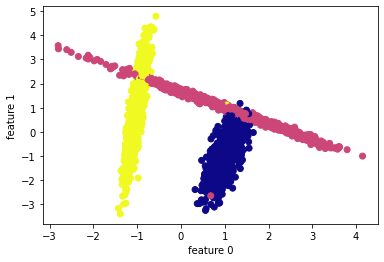

In [2]:
X, y = make_classification(n_samples=3000, n_features=2, n_classes=3, 
                           n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=993)

plt.figure()
plt.scatter(X[:,0], X[:,1], cmap='plasma', c=y)
plt.xlabel('feature 0'); plt.ylabel('feature 1')
plt.show()

In [17]:
def plot_mesh(model, y, X, title):

    n_classes = 3
    plot_colors = "ryb"
    plot_step = 0.02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel('features 0'); plt.ylabel('features 1')

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
    plt.title(title)

## Plots

We are going to plot decision surfaces tree classifier at various depths comparing how linear trees and decision trees work

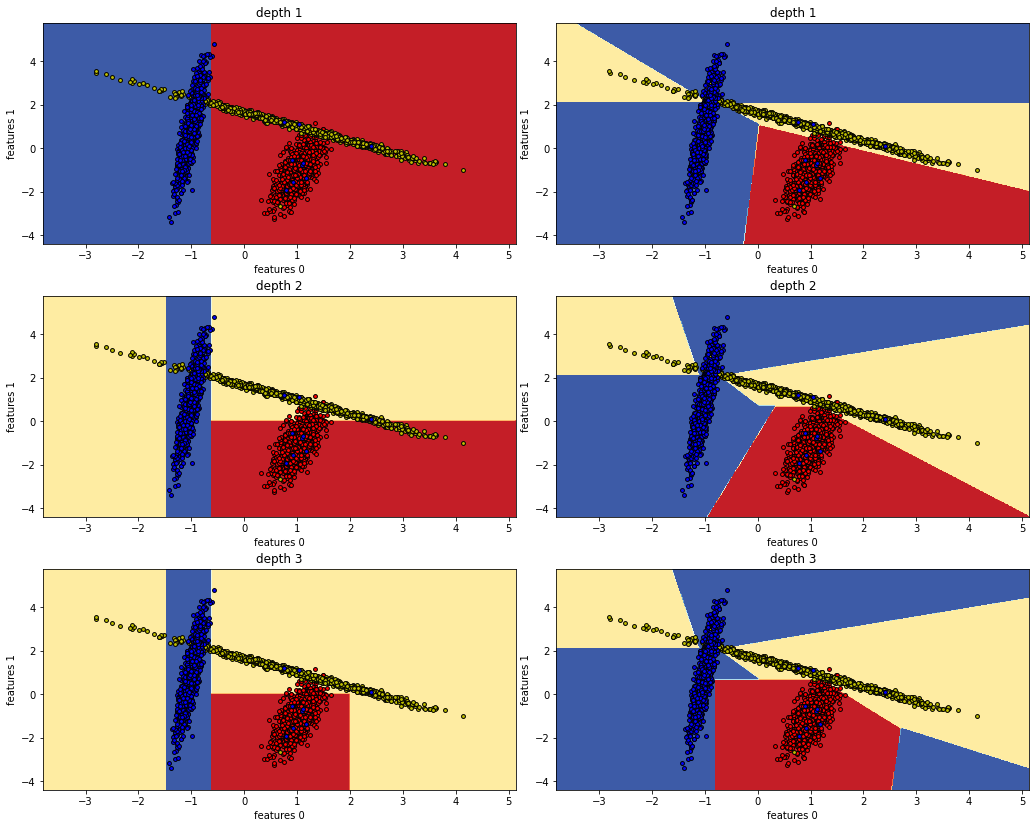

In [18]:
plt.figure(figsize=(15,12))

it = 1
depth = 1

while it < 7:
    
    if it%2 == 0:
        tree = LinearTreeClassifier(
            base_estimator = LogisticRegression(),
            min_samples_leaf = 100,
            max_depth = depth
        ).fit(X, y)
        
    else:
        tree = DecisionTreeClassifier(
            max_depth = depth
        ).fit(X, y)
        
    plt.subplot(3,2, it)
    plot_mesh(tree, y, X, title="depth {}".format(depth))
    
    it += 1
    
    if it == 3:
        depth = 2
    if it == 5:
        depth = 3

We can observe that the traditional tree (left column) is quite limited, it only can do partitions in the space with lines that are parallel to the coordinate axes. In the other hand, the linear tree is able to split the space, also linearly, in other directions that fit the data in a better way. 

In fact, when the depth is one the traditional tree, as it has made only one split, it lets the sample separated into two leaves and therefore it can only give at most two classes as output, whereas the linear tree can give multiple outputs with only one partition.

## Models at the leaves

These trees work exactly the same as traditional ones in terms of splitting.

In [3]:
X, y = make_classification(n_samples=5000, n_classes=2)

In [18]:
lt = LinearTreeClassifier(base_estimator=LogisticRegression(), max_depth=3, min_samples_leaf=100)

In [19]:
lt.fit(X,y)

LinearTreeClassifier(base_estimator=LogisticRegression(), max_depth=3,
                     min_samples_leaf=100)

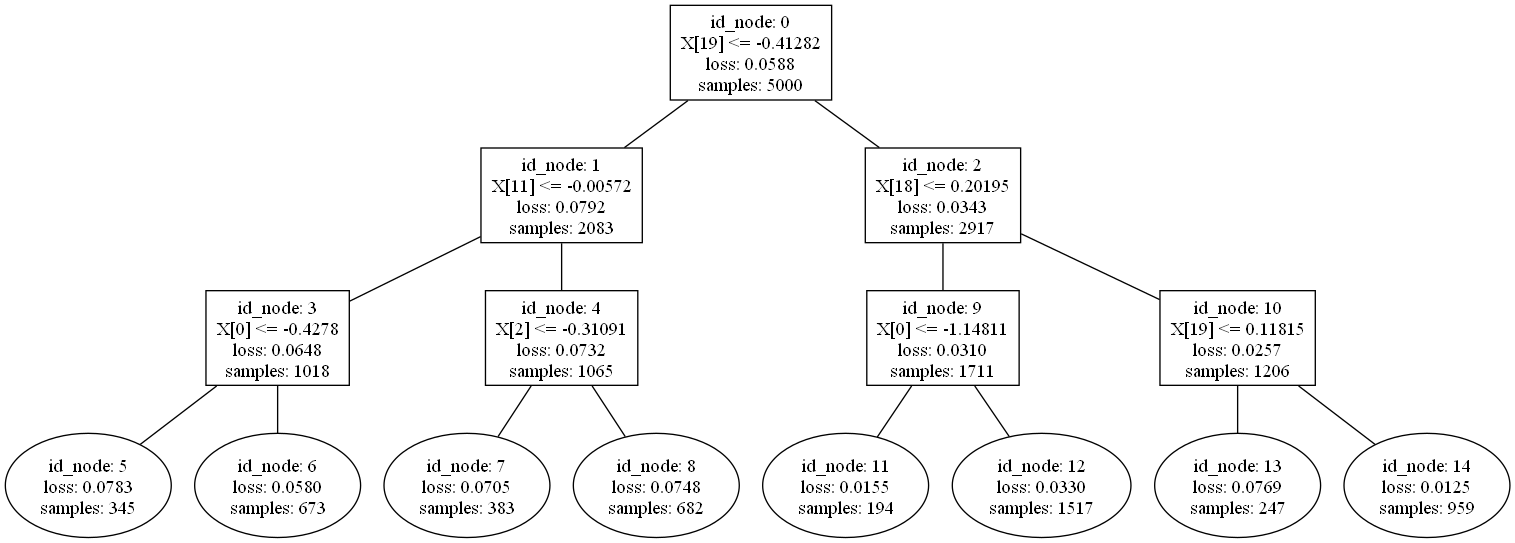

In [20]:
lt.plot_model()

The difference is in the leaves. In each one, a logistic regression model is executed and we can examinate those models as shown:

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

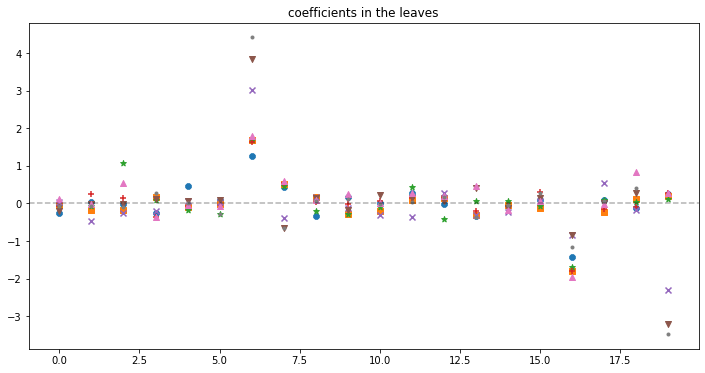

In [21]:
leaves = lt.summary(only_leaves=True)
markers = '8s*+xv^.'

plt.figure(figsize=(12,6))
for m,(i,l) in enumerate(leaves.items()):
    plt.scatter(range(X.shape[1]), l['models'].coef_, 
                marker=markers[m], label="node {}".format(i))

plt.axhline(0, c='black', linestyle='--', alpha=0.3)
plt.title('coefficients in the leaves')
plt.xticks(range(X.shape[1]), X.columns)
plt.ylabel('coefficients'); plt.xlabel('features')
plt.legend()

If we had names of the features instead of having an artificial dataset, their names would lie in the horizontal axe. Each figure represents a node. We can interpret from this graph that columns with several figures close to zero are features that are not very relevant.